#A look at Users and Repositories Dataframes  
Uploading the pre-scraped csv files(scraping code not shown in this file) into Pandas dataframes and taking a look.

In [1]:
import pandas as pd

users_df = pd.read_csv('users.csv', na_filter=False, dtype={'hireable': str})
repos_df = pd.read_csv('repositories.csv', na_filter = False, dtype={'has_projects':str, 'has_wiki':str})

In [3]:
users_df.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,tiangolo,Sebastián Ramírez,,"Berlin, Germany",tiangolo@gmail.com,true,"Creator of FastAPI, Typer, SQLModel, Asyncer, ...",73,26442,3,2012-01-12T22:37:04Z
1,schacon,Scott Chacon,GITBUTLERAPP,"Berlin, Germany",schacon@gmail.com,false,,215,13756,26,2008-01-27T17:19:28Z
2,rwieruch,Robin Wieruch,,Berlin/Remote,,true,React & Next.js • JavaScript & TypeScript • Fr...,151,8617,30,2012-10-03T15:11:48Z
3,shuding,Shu Ding,VERCEL,Berlin,g@shud.in,false,Be curious. Read widely. Try new things. — aar...,149,6756,345,2013-02-23T07:46:30Z
4,android10,Fernando Cejas,PEPPR-IO,"Berlin, Germany",android10@fernandocejas.com,true,Quantum Engineering at @Qruise-ai. Former Dire...,79,6716,85,2012-01-20T21:35:31Z


In [4]:
repos_df.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,tiangolo,tiangolo/a2wsgi,2024-01-07T20:24:07Z,10,10,,true,true,apache-2.0
1,tiangolo,tiangolo/alembic,2020-05-22T09:50:31Z,5,5,,true,true,mit
2,tiangolo,tiangolo/anaconda_cluster_install,2015-03-11T14:58:44Z,5,5,Shell,true,true,
3,tiangolo,tiangolo/angular-docker-multi-stage-example,2017-10-02T18:43:28Z,15,15,,true,true,
4,tiangolo,tiangolo/annotated-types,2023-08-27T14:32:00Z,8,8,,true,false,mit


#Company Presence Rating

##About the rating  
In this section, the aim is to determine the Top 10 companies based on presence. For this purpose I self-defined a **Company_Presence_Rating** .  
The rating is calculated based on two components for the employees of the company :  
1. 'total_followers'  
2. 'total_stargazers_count'  
  
Both **components have equal weights(0.5)** and the **rating scale ranges from 0.0 to 1.0**  


##Notes  


1.   The dataset and analysis is only based on users in Berlin with greater than 200 followers.
2.   Users whose company name is not available have been ignored in the analysis.




##Code & Charts

In [28]:
import pandas as pd

# Filter out rows where 'company' is an empty string or null
filtered_users = users_df[users_df['company'].replace('', pd.NA).notna()]

# Group by 'company' and aggregate total followers and total stargazers count
company_stats = (
    filtered_users.groupby('company')
    .agg(total_followers=('followers', 'sum'),
         total_stargazers_count=('login', lambda x: repos_df[repos_df['login'].isin(x)]['stargazers_count'].sum()))
)

# Sort the companies by total followers in descending order and get the top 10
top_companies = company_stats.sort_values(by='total_followers', ascending=False).head(10)

# Normalize the total_followers and total_stargazers_count to create Company_Presence_Rating
max_followers = top_companies['total_followers'].max()
max_stargazers = top_companies['total_stargazers_count'].max()

top_companies['Company_Presence_Rating'] = (
    (top_companies['total_followers'] / max_followers) +
    (top_companies['total_stargazers_count'] / max_stargazers)
) / 2



In [22]:
# Sort top companies by Company_Presence_Rating in ascending order
sorted_companies = top_companies.sort_values(by='Company_Presence_Rating',ascending=False)

print("Top 10 companies sorted by Company Presence Rating:")
sorted_companies


Top 10 companies sorted by Company Presence Rating:


,total_followers,total_stargazers_count,Company_Presence_Rating
company,,,
VERCEL,8035,35928,0.748159
GOOGLE,9819,28578,0.717656
OBJECTBOX,5506,38977,0.696854
GITBUTLERAPP,13985,10698,0.637235
RED HAT,6232,26826,0.566936
PEPPR-IO,6716,23999,0.547975
MICROSOFT,8631,8975,0.423713
DATADOG,4040,21149,0.415741
NOT INTERESTED IN RECRUITER MAIL,6523,5076,0.298329


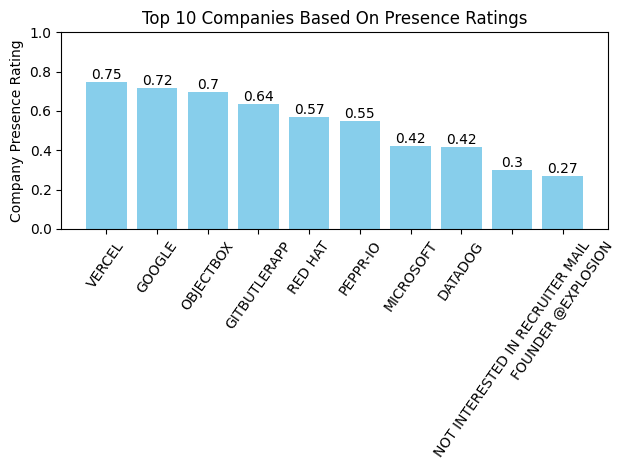

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated top_companies and Company_Presence_Rating
sorted_companies = top_companies.sort_values(by='Company_Presence_Rating', ascending=False)

# Create a Pareto chart
fig, ax = plt.subplots()

# Create bars for the Company Presence Rating
bars = ax.bar(sorted_companies.index, sorted_companies['Company_Presence_Rating'], color='skyblue')

# Add rating values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Company Presence Rating')
ax.set_title('Top 10 Companies Based On Presence Ratings')

# Set the y-axis limits from 0.0 to 1.0
ax.set_ylim(0.0, 1.0)

# Set x-ticks and labels to avoid FixedFormatter warning
ax.set_xticks(range(len(sorted_companies.index)))
ax.set_xticklabels(sorted_companies.index, rotation=55)

plt.savefig('top_companies.png', bbox_inches='tight')  # Save the chart as 'top_companies.png'

# Show the plot
plt.tight_layout()
plt.show()


#Observations and Results
1. I have observed that VERCEL has the highest presence.
2. Interestingly, although Google is 2nd, Microsoft is at 7th.  
3. Also, people who are not interested in recruiter mail(indicating stable developers) also have a healthy presence at the 9th spot.

#Recommendation to Developers

Let's take a look at the most popular languages among users from the Top 5 Companies based in Berlin with greater than 200 followers.

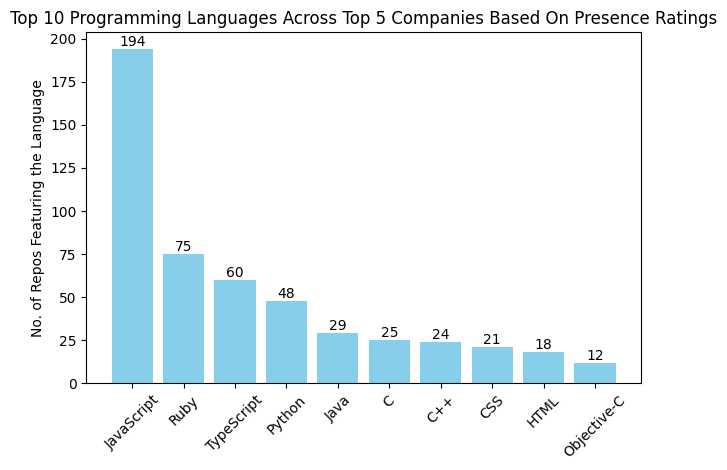

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# List of companies to analyze
companies = ['VERCEL', 'GOOGLE', 'OBJECTBOX', 'GITBUTLERAPP', 'REDHAT']

# Filter users_df to include only the specified companies
filtered_users = users_df[users_df['company'].isin(companies)]

# Merge the filtered users with repos_df on the 'login' column
merged_repos = pd.merge(filtered_users[['login', 'company']], repos_df, on='login')

# Exclude empty string values from the 'language' column
merged_repos = merged_repos[merged_repos['language'].notna() & (merged_repos['language'] != '')]

# Get the top 10 languages across all specified companies
top_languages_combined = merged_repos['language'].value_counts().head(10)

# Create a Pareto chart
fig, ax = plt.subplots()

# Create bars for the languages
bars = ax.bar(top_languages_combined.index, top_languages_combined.values, color='skyblue')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('No. of Repos Featuring the Language')
ax.set_title('Top 10 Programming Languages Across Top 5 Companies Based On Presence Ratings')

# Set x-ticks and rotate them
ax.set_xticks(range(len(top_languages_combined.index)))  # Set tick positions
ax.set_xticklabels(top_languages_combined.index, rotation=45)  # Set tick labels

plt.savefig('top_languages.png', bbox_inches='tight')  # Save the chart as 'top_languages.png'

# Show the plot
plt.tight_layout()
plt.show()


**Recommendation to Developers** : JavaScript is by far the most popular language among users of the Top 5 companies in Berlin. So, to increase the number of followers developers can focus on JavaScript related projects on Github.